In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [88]:
def straight_line(x, m, c): return m*x+c

def plotting_function(xs, ys, curve_props, sigma_y, xlabel='', ylabel='', plot_shape='k.', round_to=4, tex_pos=(0.45, 0.15)):
    popt, pcov = curve_props
    chisqr = np.sum((ys-straight_line(xs, popt[0], popt[1]))**2/sigma_y**2)
    dof = len(ys) - 2
    chisqr_red = chisqr/dof
    # print(r'Reduced $\chi^2 =$', chisqr_red)

    text = f"If the Equation is y = mx + c\nFor the best fit curve: \n"
    text += f"    m = {format(popt[0], '.5g')} ± {format(pcov[0][0]**0.5, '.4g')}\n"
    text += f"    c = {format(popt[1], '.4g')} ± {format(pcov[1][1]**0.5, '.4g')}\n"
    print(text)
    print("The curve looks like:")

    span = max(xs) - min(xs)
    a = 0.05
    factor = span*a

    xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

    plt.figure(figsize=(8,6))
    # plt.errorbar(xs, ys, yerr=sigma_y, capsize=3, fmt='k.', label=r'$\sigma_y$')
    plt.plot(xs, ys, plot_shape, label='Data Points') 
    plt.plot(xFit, straight_line(xFit, popt[0], popt[1]), '--k', label='Least-square Fit')
    # plt.plot(xFit, straight_line(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--")
    # plt.plot(xFit, straight_line(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.minorticks_on()
    # plt.grid(which='major', alpha=0.5)
    # plt.grid(which='minor', alpha=0.3)

    plt.text(tex_pos[0], tex_pos[1], text, fontsize=12, transform=plt.gcf().transFigure)

In [99]:
B = np.array([675, 585, 505, 402, 361])*0.001
delta_k = np.array([32.93, 26.56, 23.35, 18.49, 15.62])
sigma_y = np.full(len(B), 0.01)

If the Equation is y = mx + c
For the best fit curve: 
    m = 52.503 ± 2.948
    c = -3.156 ± 1.529

The curve looks like:


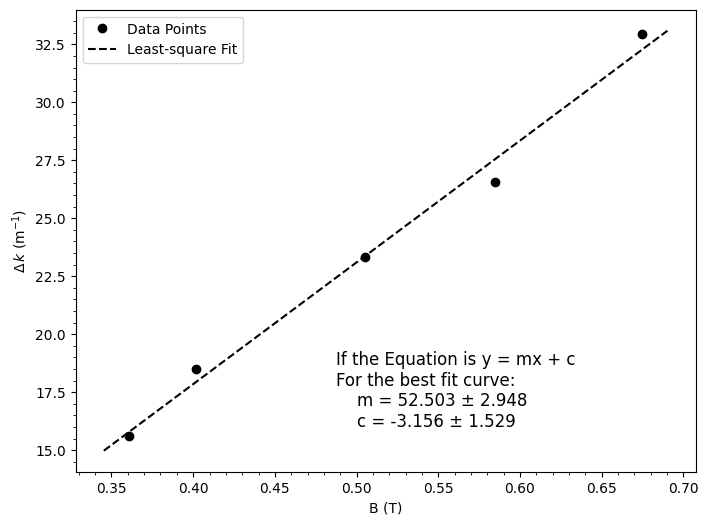

In [100]:
curve = curve_fit(f=straight_line, xdata=B, ydata=delta_k)
plotting_function(B, delta_k, curve, sigma_y, 'B (T)', r'$\Delta\,k$ (m$^{-1}$)', plot_shape='ko')

In [96]:
muB = (curve[0][0])*6.62607015E-34*299798456/2
muB_err = ((curve[1][0][0]**0.5)/(curve[0][0]))*muB
print(f'Wavelength: ({round(muB*1e24, 3)} ± {round(muB_err*1e24, 3)}) x 10^24')

Wavelength: (5.215 ± 0.293) x 10^24
